In [327]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt



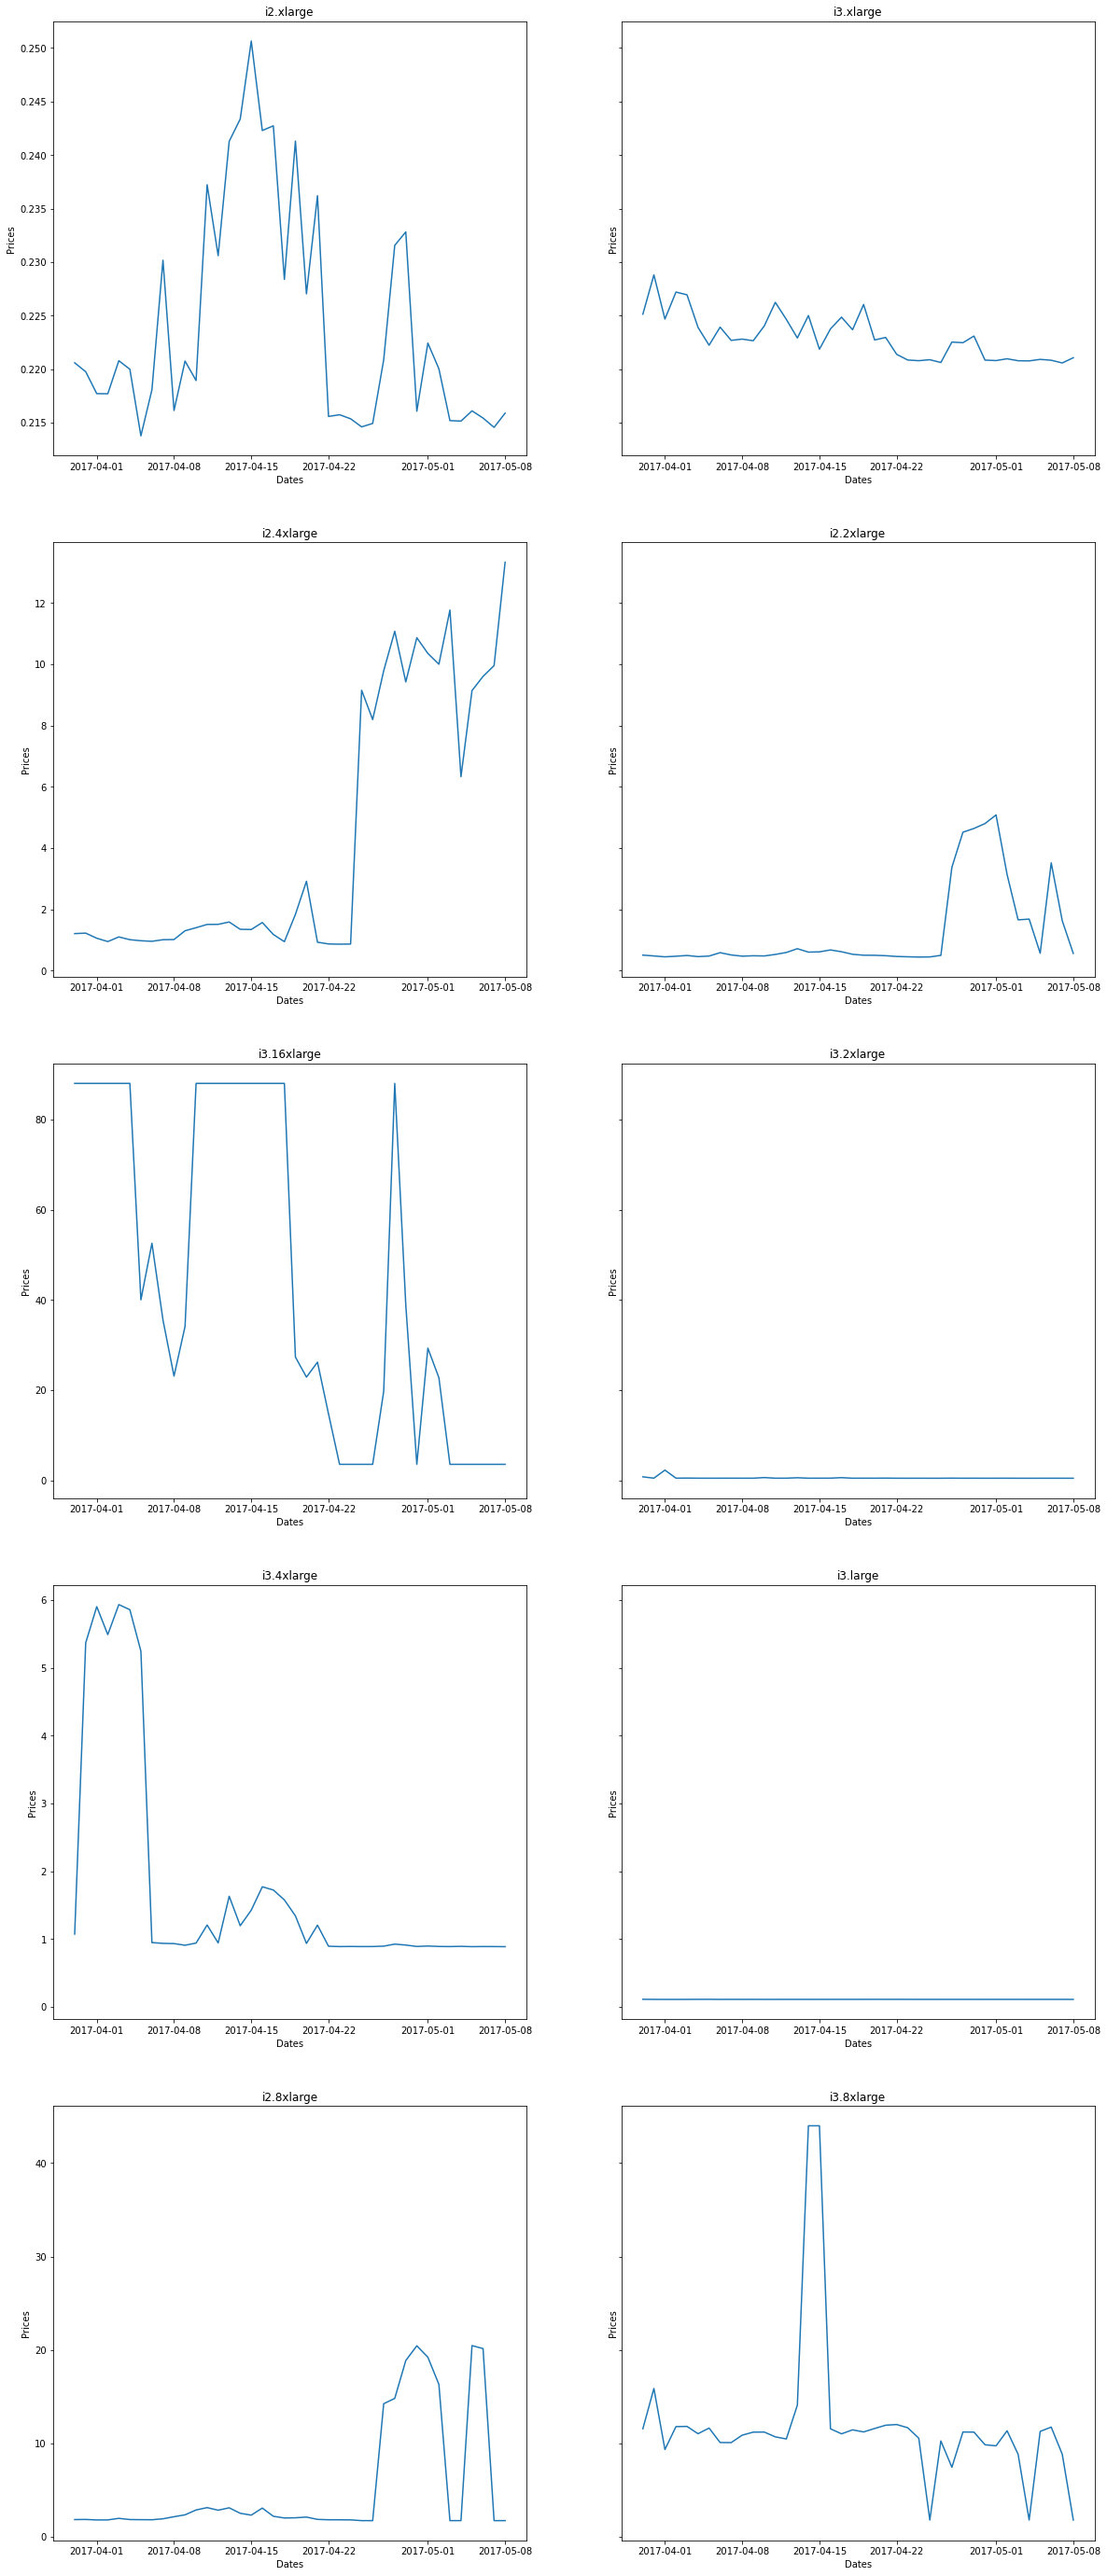

In [397]:
data = pd.read_csv('ap-northeast-1.csv',parse_dates=True, names=['Date','Aws','Spot','Region','Price'],index_col='Date')
dt = data

data = data[data['Spot'] == 'Windows']
data = data[data['Aws'].str.startswith("i")]

fig, axes = plt.subplots(5, 2, figsize=(20,20), sharey='row')
awsname = data.Aws.unique()
count = -1
for row in range(5):
    for column in range(2):
        count += 1
        d = data.groupby(['Aws'])
        d = d.get_group(list(awsname)[count]) 
        axes[row, column].set_xlabel('Dates')
        axes[row, column].set_ylabel('Prices')
        axes[row,column].plot(d.resample('D')['Price'].mean())
        axes[row,column].set_title(awsname[count])
pt.subplots_adjust(top = 2)

pt.show()
